In [932]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [933]:
# Diskrete Ableitung Funktion
def Diff(f, h, order):
    N = len(f)

    if order == 1:
        D = np.diag(np.ones(N - 1), 1) - np.diag(np.ones(N - 1), -1)
        D[0, 0] = -2
        D[0, 1] = 2
        D[N - 1, N - 1] = 2
        D[N - 1, N - 2] = -2
        D = D / (2 * h)
    elif order == 2:
        D = -2 * np.diag(np.ones(N)) + np.diag(np.ones(N - 1), 1) + np.diag(np.ones(N - 1), -1)
        D[0, :] = 0
        D[N - 1, :] = 0
        D = D / (h * h)
    else:
        return f

    return np.dot(D, f)

In [934]:
# Daten laden
Q = np.loadtxt("data.dat")

I = [np.min(Q[:, 0]), np.max(Q[:, 0])]
x = Q[:, 0]
f = Q[:, 1]
N = len(f)
h = (I[1] - I[0]) / (N - 1)

In [935]:
# Glätten - wenn benötigt
LOOP = 100
delta = 4.e-03
# for l in range(LOOP):
#     d2f = Diff(f, h, 2)
#     f = f + delta * d2f

In [936]:
# Diskrete Ableitungen
d1y = Diff(f, h, 1)
d2y = Diff(f, h, 2)

display(d1y)
display(d2y)

In [938]:
# Nullstellen der Ausgangsfunktion
IndN = np.where(f[:-1] * f[1:] < 0)[0]
xN = (x[IndN] + x[IndN + 1]) / 2
yN = (f[IndN] + f[IndN + 1]) / 2
N_vals = np.column_stack((xN, yN))
print("Nullstelle der Ausgangsdaten:")
print(N_vals)

Nullstelle der Ausgangsdaten:
[[0.1 0. ]
 [0.9 0. ]]


In [939]:
# Nullstellen der ersten Ableitung
IndE = np.where(d1y[:-1] * d1y[1:] < 0)[0]
xE = (x[IndE] + x[IndE + 1]) / 2
yE = (d1y[IndE] + d1y[IndE + 1]) / 2
E_vals = np.column_stack((xE, yE))
print("Nullstelle in der ersten Ableitung:")
print(E_vals)

Nullstelle in der ersten Ableitung:
[[0.5 0. ]]


In [940]:
# Nullstellen der zweiten Ableitung
IndW = np.where(d2y[:-1] * d2y[1:] < 0)[0]
xW = (x[IndW] + x[IndW + 1]) / 2
yW = (d2y[IndW] + d2y[IndW + 1]) / 2
W_vals = np.column_stack((xW, yW))
print("Nullstelle in der zweiten Ableitung:")
print(W_vals)

Nullstelle in der zweiten Ableitung:
[[0.9 1. ]]


In [941]:
# Ansatzfunktion G und Ableitungen
alpha, beta, gamma, t = sp.symbols('alpha beta gamma t')

## Ansatzfunktion
G = sp.log((alpha * (t - beta)**2) + gamma)

display(sp.simplify(G))
dG = sp.diff(G, t)
display(sp.simplify(dG))
d2G = sp.diff(dG, t)
display(sp.simplify(d2G))

log(alpha*(beta - t)**2 + gamma)

-2*alpha*(beta - t)/(alpha*(beta - t)**2 + gamma)

2*alpha*(-alpha*(beta - t)**2 + gamma)/(alpha*(beta - t)**2 + gamma)**2

In [942]:
# Nullstellen der Ansatzfunktion
print("Funktion == 0:")
np_roots = sp.solve(G, t)
display(np_roots)
print("Erste Ableitung == 0:")
hp_roots = sp.solve(dG, t)
display(hp_roots)
print("Zweite Ableitung == 0:")
wp_roots = sp.solve(d2G, t)
display(wp_roots)

Funktion == 0:


[beta - sqrt(1 - gamma)/sqrt(alpha), beta + sqrt(1 - gamma)/sqrt(alpha)]

Erste Ableitung == 0:


[beta]

Zweite Ableitung == 0:


[(alpha*beta - sqrt(alpha*gamma))/alpha,
 (alpha*beta + sqrt(alpha*gamma))/alpha]

In [943]:
# Parameter der Ansatzfunktion an diskrete Punkte anpassen
equations = [
    sp.Eq(np_roots[0], xN[0]),
    sp.Eq(hp_roots[0], xE[0]),
    sp.Eq(wp_roots[1], xW[0]), 
]
solution = sp.solve(equations, (alpha, beta, gamma),  dict=True)

display(solution)
solution = solution[0]

# Parameter in Ansatzfunktion einsetzen
sol = G.subs({alpha: solution[alpha], beta: solution[beta], gamma: solution[gamma]})
display(sol)

[{alpha: 3.12500000000000, beta: 0.500000000000000, gamma: 0.500000000000000}]

log(3.125*(t - 0.5)**2 + 0.5)

In [944]:
# x-Werte für Ansatzfunktionsplot vorbereiten
DIM = 1000
xx = np.linspace(I[0], I[1], DIM)
sol_np = sp.lambdify(t, sol, 'numpy')

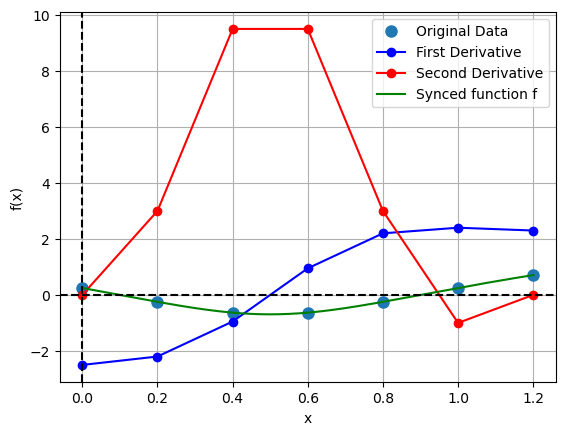

In [945]:
# Plotten
plt.plot(x, f, 'o', markersize=8, label='Original Data')
plt.plot(x, d1y, 'bo-', label='First Derivative')
plt.plot(x, d2y, 'ro-', label='Second Derivative')
plt.plot(xx, sol_np(xx), 'g-', label='Synced function f')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()